#   **Pattern recognition course | ECE AUTH | 2nd project | Winter semester 2022**



>   Giachoudis Christos | 9912 | giachoud@ece.auth.gr


>   Kostopoulos Andreas Marios | 9658 | andreasmk@ece.auth.gr

# **General comments**



# Necessary imports

In [1]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import statistics
from matplotlib import cm

# Data that are given by the task

In [ ]:
# Task data

# **Part A**

# **Task A.1**

# **Task A.2**

# **Part B**

[-60.   -59.99 -59.98 ...  59.97  59.98  59.99]
[0.0008603  0.00086058 0.00086086 ... 0.00086113 0.00086086 0.00086058]


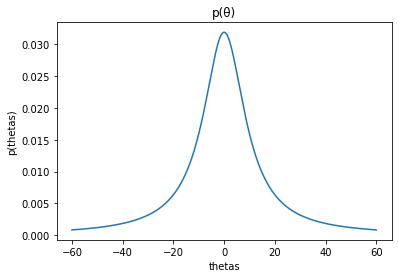

In [2]:
# p(θ) = (1/10π)*[1/(1+(θ/10)^2)]
theta = np.arange(-60, 60, 0.01)
p_theta = (1/(10*math.pi)) * (1/(1 + (theta/10)**2))
print(theta)
print(p_theta)
plt.title("p(θ)") 
plt.xlabel("thetas") 
plt.ylabel("p(thetas)") 
plt.plot(theta, p_theta) 
plt.show()

# **Task B.1**

# **Task B.2**